<a href="https://colab.research.google.com/github/mazenmobtasem/Data-Analysis-Course/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, copy
import time
%matplotlib inline

In [2]:
df = pd.read_csv('s.csv')
df.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [3]:
df.isnull().sum().sum()

0

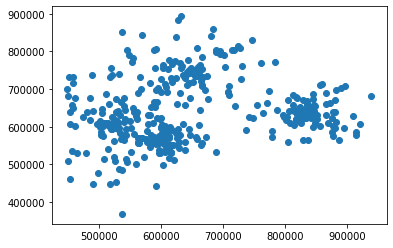

In [4]:
plt.scatter(df['x1'],df['x2'])

In [5]:
def eculid_distance(x, y):
  return math.sqrt(pow(x[0] - y[0], 2) + pow(x[1]-y[1], 2))

In [6]:
Clusters = []
for i in range(len(df)):
    Clusters.append([(df.loc[i]['x1'], df.loc[i]['x2'])])

# First approach: clustering with min value (Single Linkage) 
# Min approach


In [7]:
start = time.time()
copyOfClusters = copy.deepcopy(Clusters)
while(len(copyOfClusters) > 4):
    chosenIndices = (-1,-1)
    minDistanceBetweenClusters = -1
    for i in range(len(copyOfClusters)):
        for j in range(i+1, len(copyOfClusters)):
            currDst = eculid_distance(copyOfClusters[i][0],copyOfClusters[j][0])
            for pointX in copyOfClusters[i]:
                for pointY in copyOfClusters[j]:
                    currDst = min(currDst, eculid_distance(pointX,pointY))
            if(minDistanceBetweenClusters == -1 or currDst < minDistanceBetweenClusters):
                chosenIndices = (i, j)
                minDistanceBetweenClusters = currDst
                    
    newCluster = []
    for point in copyOfClusters[chosenIndices[0]]:
        newCluster.append(point)
    for point in copyOfClusters[chosenIndices[1]]:
        newCluster.append(point)
        
    copyOfClusters.pop(chosenIndices[1])
    copyOfClusters.pop(chosenIndices[0])
    copyOfClusters.append(newCluster)
stop = time.time()
print("The time of the run:", stop - start)

The time of the run: 67.0072853565216


Text(0.5, 1.0, 'ACH using min')

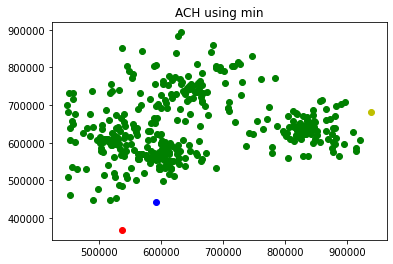

In [8]:
colors = ['y','b', 'r', 'g']
c_idx = 0
for cluster in copyOfClusters:
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    plt.scatter(x, y, c = colors[c_idx])
    c_idx += 1
plt.title('ACH using min')

Text(0.5, 1.0, 'ACH using min with SKlearn')

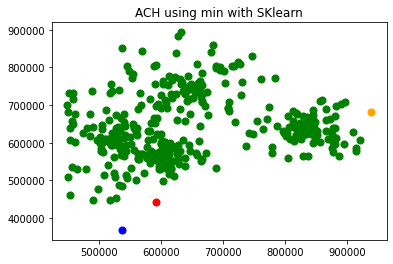

In [9]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
X = df.iloc[:, [0, 1]].values
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='orange')
plt.title('ACH using min with SKlearn')

# Second Approach: clustering with max value (Complete Linkage)
# Max approach


In [10]:
start = time.time()
copyOfClusters = copy.deepcopy(Clusters)
while(len(copyOfClusters) > 4):
    chosenIndices = (-1,-1)
    minDistanceBetweenClusters = -1
    for i in range(len(copyOfClusters)):
        for j in range(i+1, len(copyOfClusters)):
            currDst = eculid_distance(copyOfClusters[i][0],copyOfClusters[j][0])
            for pointX in copyOfClusters[i]:
                for pointY in copyOfClusters[j]:
                    currDst = max(currDst, eculid_distance(pointX,pointY))
            if(minDistanceBetweenClusters== -1 or currDst  < minDistanceBetweenClusters):
                chosenIndices = (i, j)
                minDistanceBetweenClusters = currDst     
    newCluster = []
    for point in copyOfClusters[chosenIndices[0]]:
        newCluster.append(point)
    for point in copyOfClusters[chosenIndices[1]]:
        newCluster.append(point)

    copyOfClusters.pop(chosenIndices[1])
    copyOfClusters.pop(chosenIndices[0])

    copyOfClusters.append(newCluster)
stop = time.time()
print("The time of the run:", stop - start)   

The time of the run: 72.32447504997253


Text(0.5, 1.0, 'ACH using max')

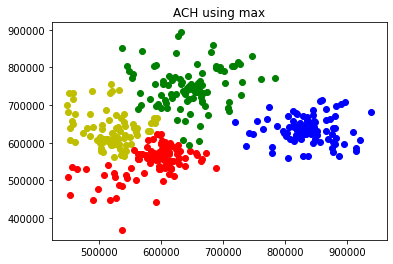

In [11]:
colors = ['y','b', 'r', 'g']
c_idx = 0
for cluster in copyOfClusters:
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    plt.scatter(x, y, c = colors[c_idx])
    c_idx += 1
plt.title('ACH using max')

# Checking with Sklearn


Text(0.5, 1.0, 'ACH using max with SKlearn')

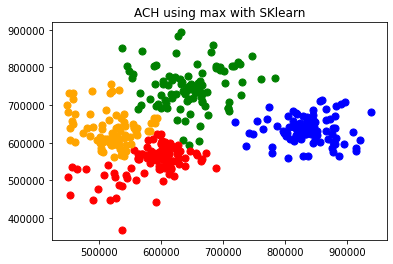

In [12]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
X = df.iloc[:, [0, 1]].values
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='orange')
plt.title('ACH using max with SKlearn')

# Third Approach: clustering with average value 
# Average Approach


In [13]:
start = time.time()
copyOfClusters = copy.deepcopy(Clusters)
while(len(copyOfClusters) > 4):
    chosenIndices = (-1,-1)
    minDistanceBetweenClusters = -1
    
    for i in range(len(copyOfClusters)):
        for j in range(i+1, len(copyOfClusters)):
            currDst = 0
            for pointX in copyOfClusters[i]:
                for pointY in copyOfClusters[j]:
                    currDst += eculid_distance(pointX,pointY)
            currDst /= (len(copyOfClusters[i]) * len(copyOfClusters[j]))
            if(minDistanceBetweenClusters== -1 or currDst  < minDistanceBetweenClusters):
                chosenIndices = (i, j)
                minDistanceBetweenClusters = currDst
                    
    newCluster = []
    for point in copyOfClusters[chosenIndices[0]]:
        newCluster.append(point)
    for point in copyOfClusters[chosenIndices[1]]:
        newCluster.append(point)
        
    copyOfClusters.pop(chosenIndices[1])
    copyOfClusters.pop(chosenIndices[0])
    copyOfClusters.append(newCluster)
stop = time.time()
print("The time of the run:", stop - start)  

The time of the run: 54.14780044555664


Text(0.5, 1.0, 'ACH using average')

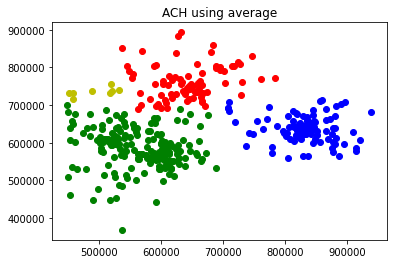

In [14]:
colors = ['y','b', 'r', 'g']
c_idx = 0
for cluster in copyOfClusters:
    x = [point[0] for point in cluster]
    y = [point[1] for point in cluster]
    plt.scatter(x, y, c = colors[c_idx])
    c_idx += 1
plt.title('ACH using average')


Text(0.5, 1.0, 'ACH using average with SKlearn')

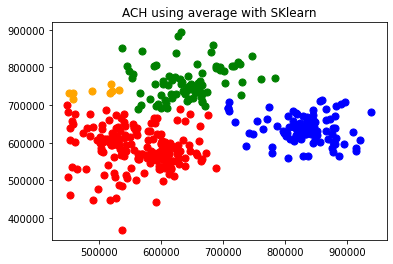

In [15]:
X = df.iloc[:, [0, 1]].values
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
model.fit(X)
labels = model.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='orange')
plt.title('ACH using average with SKlearn')

It is noticed that the algorithm that gave the fastest time is the average approach but made 2 equal clusters and 1 large and one very small cluster while the Max approach was able to divide them into 4 nearly equal in size clusters. On the other hand, the cluster with the min approach made the worst time and was very bad at clustering as it made on big cluster.

# Kmeans

Text(0.5, 1.0, 'KMeans with k = 4')

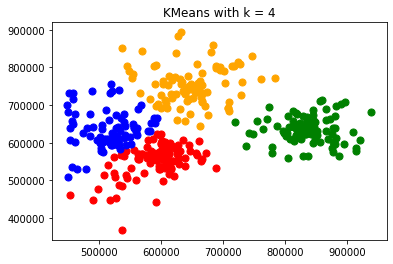

In [16]:
kmeans = KMeans(n_clusters = 4, max_iter = 300)
kmeans.fit(X)
labels = kmeans.labels_
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='orange')
plt.title('KMeans with k = 4')

It appears that the Max approach is very close to the KMeans algorithm which thus, from my point of view i recommend the Max approach